### 随机梯度下降法
不对所有样本进行计算，只固定一个样本：
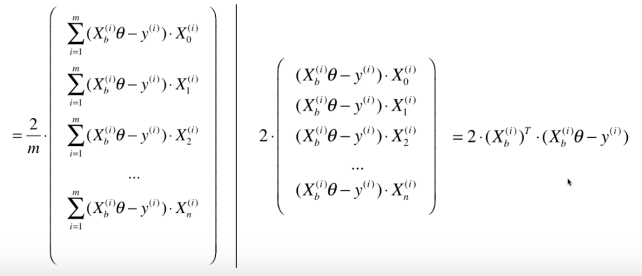
过程：不能保证每次下降都是梯度减小的方向。
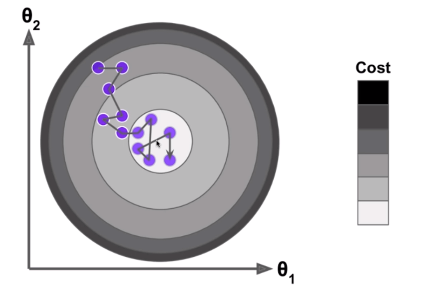
学习率的取值很重要，不能取一个固定值。因为我们希望学习率随着迭代次数的增多，是递减的。（因为，如果目前已经到达了最小值附近，但是由于随机的过程不够好，eta又是固定值，导致下一次迭代又跳出了最小值区域）。为了调整每次eta变化的均匀性，有对其进行如下调整
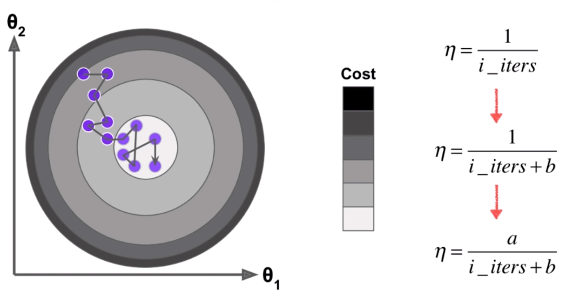

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m = 100000

x = np.random.normal(size = m)
X = x.reshape(-1, 1) # m个样本，1个特征。但是本代码适用与多个特征的数据
y = 4. * x + 3. + np.random.normal(0, 3, size = m)

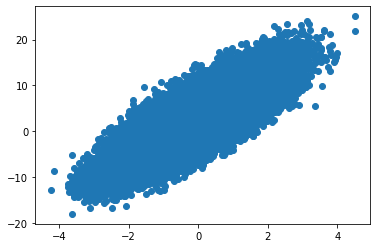

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
# 计算损失函数的值
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

# 批量梯度下降
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

In [6]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 4.35 s


In [7]:
theta

array([2.99478546, 4.01119481])

### 随机梯度下降

In [8]:
def dJ_sgd(theta, X_b_i, y_i):  # 只传入一个样本
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

# 随机梯度下降
# n_iters，迭代次数
def sgd(X_b, y, initial_theta, n_iters):

    t0, t1 = 5, 50  # 用与调整eta每次变化的均匀度
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    # 相比于批量梯度下降，去掉了当精度差小于某一固定值时便退出循环的条件。
    # 这是因为随机梯度下降的过程中，梯度下降的方向是随机的。不能保证损失函数一直在减小
    # 精度差变小了，不能说明靠近了最小值点，也有可能和本次随机样本得到的梯度相关。
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b)) # 随机取得一个样本
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [9]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
# 只需要循环1/3个样本总量的次数就可以了
theta = sgd(X_b, y, initial_theta, n_iters=m//3)

# 时间提高了很多

Wall time: 534 ms


In [10]:
theta

array([2.9777256 , 3.96212697])